# Modelamiento del Conjunto de Datos: Satisfacción de Clientes

## 1. Implementación de Modelos de Clasificación
- Utilizar la versión de clasificación para cada modelo estudiado en clases.
- Predecir la **variable respuesta** (última columna) y calcular las probabilidades para la **variable target**.
- Generar una **tabla de error** que contenga las siguientes métricas de clasificación:
    - Precision
    - Recall
    - F1-Score
    - AUC
- Agregar los siguientes elementos:
    - **Matriz de Confusión**: Utilizar `confusion_matrix`.
    - **Curvas ROC**: Utilizar `plot_roc`.
- Registrar los resultados en una **tabla de error** (similar a Tabla 1) que resuma cada métrica obtenida por modelo.

---

## Cargue e instalación de librerías

In [4]:
!pip install git+https://github.com/neurosynth/ACE.git

  Cloning https://github.com/neurosynth/ACE.git to /tmp/pip-req-build-6jnzqj1a
  Running command git clone --filter=blob:none --quiet https://github.com/neurosynth/ACE.git /tmp/pip-req-build-6jnzqj1a
  Resolved https://github.com/neurosynth/ACE.git to commit ebcf4fc1d0ab5cea5b0b622e9b7c8271388b6295
  Preparing metadata (setup.py) ... done
  Created wheel for ace: filename=ace-0.1.0.dev0-py3-none-any.whl size=644520 sha256=02edf07d434e75c2b761ed4adf1f9d761f4db31ea11ae668197ddb6a42db21dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-4lxi37nu/wheels/97/ff/c8/83cdb258a78a2907b7785fb855667bd567ebc441201529da20
Successfully built ace


In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy tabulate plotly statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.4 MB/s eta 0:00:00


In [6]:
!pip install imbalanced-learn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.3 MB/s eta 0:00:00


In [7]:
!pip install pqdm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [10]:
from google.colab import drive  # Import the drive module from google.colab
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import pickle
import os
from sklearn.model_selection import RandomizedSearchCV
from plotly.graph_objs import Histogram
from tabulate import tabulate
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
# Instead of importing plot_roc_curve, import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from pqdm.threads import pqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN
import joblib
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import ConfusionMatrixDisplay

Mounted at /content/drive


## Cargue de datos

In [12]:
filepath = ('/content/drive/My Drive/Parcial3/train.csv')
train = pd.read_csv(filepath)
filepath = ('/content/drive/My Drive/Parcial3/test.csv')
test = pd.read_csv(filepath)

### Filtrado de variables a modelar

In [13]:
variables = ['imp_ent_var16_ult1', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_sal_var16_ult1', 'saldo_var5', 'saldo_var8', 'saldo_var13_largo', 'saldo_var14', 'saldo_var25', 'saldo_var29', 'saldo_var33', 'saldo_var37', 'saldo_var40', 'saldo_var44', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_venta_var44_1y3', 'imp_amort_var18_ult1', 'imp_amort_var34_ult1', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_ult1', 'imp_var7_emit_ult1', 'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2', 'saldo_medio_var8_hace3', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3', 'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var17_ult1', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3', 'var38', 'num_var35', 'ind_var41_0', 'num_var13_corto', 'num_op_var41_ult1', 'num_var31', 'ind_var43_recib_ult1', 'num_var22_ult1', 'num_reemb_var17_ult1', 'ind_var26', 'num_var24_0', 'num_op_var41_efect_ult1', 'ind_var8', 'ind_var25_cte', 'num_var8_0', 'ind_var20', 'num_var26_0', 'num_var39_0', 'ind_var39_0', 'num_var17_0', 'num_var14_0', 'num_var30_0', 'ind_var40', 'num_var13_corto_0', 'num_meses_var13_largo_ult3', 'ind_var5', 'num_var39', 'num_meses_var12_ult3', 'num_var25_0', 'num_var8', 'num_meses_var8_ult3', 'num_var45_ult3', 'num_op_var39_efect_ult1', 'ind_var26_0', 'ind_var25_0', 'ind_var26_cte', 'num_aport_var13_hace3', 'num_var25', 'num_var13_largo', 'ind_var24_0', 'num_var4', 'num_meses_var39_vig_ult3', 'num_var22_hace2', 'var21', 'ind_var30', 'num_op_var41_comer_ult1', 'num_var12_0', 'ind_var24', 'num_var5', 'var15', 'num_op_var39_ult3', 'ind_var8_0', 'num_op_var39_efect_ult3', 'num_var13_0', 'ind_var13_0', 'num_var45_ult1', 'ind_var1', 'num_var42_0', 'num_var30', 'ind_var31', 'ind_var9_cte_ult1', 'ind_var25', 'ind_var13_largo_0', 'ind_var20_0', 'ind_var12_0', 'ind_var9_ult1', 'num_med_var45_ult3', 'num_var31_0', 'num_var45_hace2', 'num_var20_0', 'ind_var10cte_ult1', 'num_var13_largo_0', 'ind_var39', 'num_var1_0', 'num_op_var39_ult1', 'num_op_var40_efect_ult1', 'num_var13', 'num_var45_hace3', 'num_op_var40_efect_ult3', 'ind_var12', 'num_var40_0', 'num_op_var41_efect_ult3', 'num_var5_0', 'TARGET', 'num_var22_ult3', 'num_var1', 'num_op_var41_ult3', 'num_var40', 'ind_var31_0', 'ind_var30_0', 'ind_var13_corto', 'ind_var19', 'num_var22_hace3', 'num_meses_var5_ult3', 'ind_var13_corto_0', 'num_var42', 'ind_var13', 'num_var41_0', 'ind_var13_largo', 'ind_var14_0', 'num_var26', 'ind_var10_ult1', 'num_meses_var13_corto_ult3', 'num_var12', 'var36', 'num_var20', 'num_med_var22_ult3', 'num_var24', 'num_var43_emit_ult1', 'num_aport_var17_ult1', 'num_var37_med_ult2', 'num_op_var39_comer_ult1', 'ind_var5_0']

### Conjunto de entrenamiento

In [14]:
train_data = train[variables]  # Conjunto de entrenamiento (contiene 'TARGET')
# Contar las variables de tipo numérico (flotante) y categórico (objeto)
numeric_vars = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = train_data.select_dtypes(include=['category', 'object']).columns

# Mostrar el número de variables de cada tipo
print(f'Número de variables numéricas: {len(numeric_vars)}')
print(f'Número de variables categóricas: {len(categorical_vars)}')


Número de variables numéricas: 182
Número de variables categóricas: 0


In [15]:
type_counts = train_data.dtypes.value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
print("\nVariable Types and Counts:")
type_counts


Variable Types and Counts:


,Type,Count
0,int64,112
1,float64,70


#### Conjunto de test

In [16]:
# Filtrar las columnas necesarias (asegúrate de que 'variables' esté definida)
train_data = train[variables]  # 'variables' debe incluir todas las columnas relevantes, incluyendo 'TARGET'
test_data = test[[var for var in variables if var != 'TARGET']]  # Excluye 'TARGET' en test

# Excluir 'TARGET' de las columnas int64 y float64
train_int_vars = [var for var in train_data.select_dtypes(include=['int64']).columns if var != 'TARGET']
train_float_vars = train_data.select_dtypes(include=['float64']).columns

# Aplicar las mismas categorías al conjunto de prueba
test_data_corrected = test_data.copy()

# Transformar las columnas en test_data_corrected para que coincidan con train
if len(train_int_vars) > 0:  # Verificar si hay columnas int64
    test_data_corrected[train_int_vars] = test_data_corrected[train_int_vars].astype('int64', errors='ignore')

if not train_float_vars.empty:  # Verificar si hay columnas float64
    test_data_corrected[train_float_vars] = test_data_corrected[train_float_vars].astype('float64', errors='ignore')

# Recalcular los tipos para verificar la corrección
type_counts_test_corrected = test_data_corrected.dtypes.value_counts().reset_index()
type_counts_test_corrected.columns = ['Type', 'Count']
print("\nVariable Types and Counts (Corregido):")
type_counts_test_corrected



Variable Types and Counts (Corregido):


,Type,Count
0,int64,111
1,float64,70


# Modelos de Machine Learning

## Análisis exploratorio de la variable objetivo

Se observa que la variable `TARGET` es binaria, es decir, tiene dos posibles valores: `0 y 1`.
- El conteo para el valor `0 es 73,012 casos`, representando la mayoría de los datos.
- El conteo para el `valor 1 es 3,008` casos, lo cual corresponde a una minoría.

Esto indica un desequilibrio en la distribución de la variable objetivo, lo cual es típico en problemas de clasificación desbalanceada como el análisis de riesgo crediticio o detección de fraudes.

In [ ]:
# Contar las categorías en la variable TARGET para el gráfico de barras
target_counts = train['TARGET'].value_counts().reset_index()
target_counts.columns = ['Category', 'Count']

# Crear gráfico de barras
bar_chart = go.Bar(
    x=target_counts['Category'],
    y=target_counts['Count'],
    text=target_counts['Count'],
    textposition='auto',
    name='Distribución de TARGET'
)

# Crear el gráfico de pastel para la proporción
target_proportions = train['TARGET'].value_counts(normalize=True).reset_index()
target_proportions.columns = ['Category', 'Proportion']

pie_chart = go.Pie(
    labels=target_proportions['Category'],
    values=target_proportions['Proportion'],
    hole=0.4,
    textinfo='percent+label',
    name='Proporción de TARGET'
)

# Crear un subplots para mostrar ambos gráficos juntos
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Distribución de la Variable TARGET", "Proporción de TARGET"),
                       specs=[[{"type": "bar"}, {"type": "pie"}]])

# Agregar el gráfico de barras a la figura
fig.add_trace(bar_chart, row=1, col=1)

# Agregar el gráfico de pastel a la figura
fig.add_trace(pie_chart, row=1, col=2)

# Actualizar el layout
fig.update_layout(
    title_text="Distribución y Proporción de la Variable TARGET",
    showlegend=False
)

# Mostrar la figura
fig.show()

**Evaluar Ratio de desbalanceo entre clases**

In [ ]:
target_proportions = train['TARGET'].value_counts(normalize=True)
imbalance_ratio = target_proportions.max() / target_proportions.min()
print(f"Ratio de Desbalanceo: {imbalance_ratio:.2f}")


Ratio de Desbalanceo: 24.27


#### **Combinación Oversampling de la Clase Minoritaria y Undersampling de la clase mayoritaria (SMOTEENN)**

Se implementará una combinación entre submuestro de clase mayoritaria y sobremuestro de clase minoritaria para balanceo de clases mediante generación sintética y disminución medida de etiquetas con método SMOTEENN.

In [ ]:
# División de los datos en características y variable objetivo
X = train_data.drop('TARGET', axis=1)  # Conjunto de características sin la columna TARGET
y = train_data['TARGET']  # Variable objetivo (TARGET)

# Aplicar SMOTEENN para balancear los datos
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

- `SMOTE (Synthetic Minority Oversampling Technique):` Genera datos sintéticos para la clase minoritaria (1) para reducir el desbalance.
- `ENN (Edited Nearest Neighbors):` Filtra ruido y elimina datos redundantes, mejorando la calidad del conjunto de datos.

**Después del balanceo:**

Clase 1: Tiene 57,682 observaciones.


In [ ]:
balanced_counts = y_resampled.value_counts()

# Crear gráfico de barras interactivo
fig = go.Figure(data=[
    go.Bar(
        x=balanced_counts.index.astype(str),
        y=balanced_counts.values,
        marker_color='skyblue',
        text=balanced_counts.values,
        textposition='auto'
    )
])

# Configuración del layout del gráfico
fig.update_layout(
    title="Distribución de la Variable TARGET después del Balanceo (SMOTEENN)",
    xaxis_title="Categoría de TARGET",
    yaxis_title="Cantidad de Observaciones",
    xaxis=dict(type='category'),
    template='plotly_white'
)

# Mostrar la gráfica interactiva
fig.show()

 **Conjunto de datos a utilizar**

- `X_resampled`
- `y_resampled`

In [ ]:
print(type(X_resampled))
print(type(y_resampled))

X_resampled_copy = X_resampled.copy()
y_resampled_copy = y_resampled.copy()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X_resampled_copy = X_resampled.copy()
y_resampled_copy = y_resampled.copy()

## Modelo de Clasificación Bayesiana con balanceo de clases SMOTEENN

Para el modelo de clasificación Bayesiana se hace la división de los datos y el balanceo previo al entrenamiento del modleo para evitar fuga de datos.

In [ ]:
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_bayesian, y_resampled_bayesian = smoteenn.fit_resample(X_train, y_train)

# Lista de valores de var_smoothing a evaluar
var_smoothing_settings = np.logspace(-9, -5, num=5)  # Ejemplo: [1e-09, 1e-08, ..., 1e-05]

# Crear una lista para almacenar las métricas
metrics_list = []

# Variables para rastrear el mejor modelo
best_val_accuracy = -np.inf
best_model_bayesian = None
best_var_smoothing = None

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Iterar sobre los diferentes valores de var_smoothing con tqdm para mostrar el progreso
for var_smoothing in tqdm(var_smoothing_settings, desc="Evaluando Clasificador Bayesiano"):
    # Crear el pipeline con preprocesamiento y Naive Bayes
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('bayesian', GaussianNB(var_smoothing=var_smoothing))
    ])

    # Entrenar el modelo con el conjunto resampleado
    pipeline.fit(X_resampled_bayesian, y_resampled_bayesian)

    # Predecir en el conjunto de entrenamiento original
    y_train_pred_bayesian = pipeline.predict(X_train)
    y_train_proba_bayesian = pipeline.predict_proba(X_train)[:, 1]

    # Calcular métricas para el conjunto de entrenamiento
    train_precision_bayesian = precision_score(y_train, y_train_pred_bayesian, average='binary')
    train_recall_bayesian = recall_score(y_train, y_train_pred_bayesian, average='binary')
    train_accuracy_bayesian = accuracy_score(y_train, y_train_pred_bayesian)
    train_f1_bayesian = f1_score(y_train, y_train_pred_bayesian, average='binary')
    train_auc_bayesian = roc_auc_score(y_train, y_train_proba_bayesian)

    # Predecir en el conjunto de validación
    y_val_pred_bayesian = pipeline.predict(X_val)
    y_val_proba_bayesian = pipeline.predict_proba(X_val)[:, 1]

    # Calcular métricas para el conjunto de validación
    val_precision_bayesian = precision_score(y_val, y_val_pred_bayesian, average='binary')
    val_recall_bayesian = recall_score(y_val, y_val_pred_bayesian, average='binary')
    val_accuracy_bayesian = accuracy_score(y_val, y_val_pred_bayesian)
    val_f1_bayesian = f1_score(y_val, y_val_pred_bayesian, average='binary')
    val_auc_bayesian = roc_auc_score(y_val, y_val_proba_bayesian)

    # Añadir las métricas a la lista
    metrics_list.append({
        'Modelo': 'Bayesiano',
        'var_smoothing': var_smoothing,
        'Train_Precision': train_precision_bayesian,
        'Train_Recall': train_recall_bayesian,
        'Train_Accuracy': train_accuracy_bayesian,
        'Train_F1': train_f1_bayesian,
        'Train_AUC': train_auc_bayesian,
        'Val_Precision': val_precision_bayesian,
        'Val_Recall': val_recall_bayesian,
        'Val_Accuracy': val_accuracy_bayesian,
        'Val_F1': val_f1_bayesian,
        'Val_AUC': val_auc_bayesian
    })

    # Verificar si este modelo es el mejor hasta ahora
    if val_accuracy_bayesian > best_val_accuracy:
        best_val_accuracy = val_accuracy_bayesian
        best_model_bayesian = pipeline
        best_var_smoothing = var_smoothing

    # Imprimir el progreso similar al ejemplo proporcionado
    print(f"var_smoothing: {var_smoothing}, Training Accuracy: {train_accuracy_bayesian:.4f}, Validación Accuracy: {val_accuracy_bayesian:.4f}")

# Convertir la lista de métricas a un DataFrame
metrics_df_bayesian = pd.DataFrame(metrics_list)

Evaluando Clasificador Bayesiano:  20%|██        | 1/5 [00:01<00:07,  1.96s/it]

var_smoothing: 1e-09, Training Accuracy: 0.1471, Validación Accuracy: 0.1455


Evaluando Clasificador Bayesiano:  40%|████      | 2/5 [00:03<00:05,  1.77s/it]

var_smoothing: 1e-08, Training Accuracy: 0.1476, Validación Accuracy: 0.1461


Evaluando Clasificador Bayesiano:  60%|██████    | 3/5 [00:05<00:03,  1.71s/it]

var_smoothing: 1e-07, Training Accuracy: 0.1485, Validación Accuracy: 0.1471


Evaluando Clasificador Bayesiano:  80%|████████  | 4/5 [00:06<00:01,  1.69s/it]

var_smoothing: 1e-06, Training Accuracy: 0.1513, Validación Accuracy: 0.1499


Evaluando Clasificador Bayesiano: 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

var_smoothing: 1e-05, Training Accuracy: 0.1523, Validación Accuracy: 0.1506


1. `var_smoothing`: Representa el parámetro de suavizado, que controla la estabilidad de las estimaciones de probabilidad.
2. `Precisión`: Indica la precisión alcanzada en los conjuntos de entrenamiento y validación.

El modelo mejora su rendimiento tanto en entrenamiento como en validación a medida que se incrementa `var_smoothing`, aunque persiste una ligera brecha entre ambas precisiones, indicando potencial sobreajuste moderado.

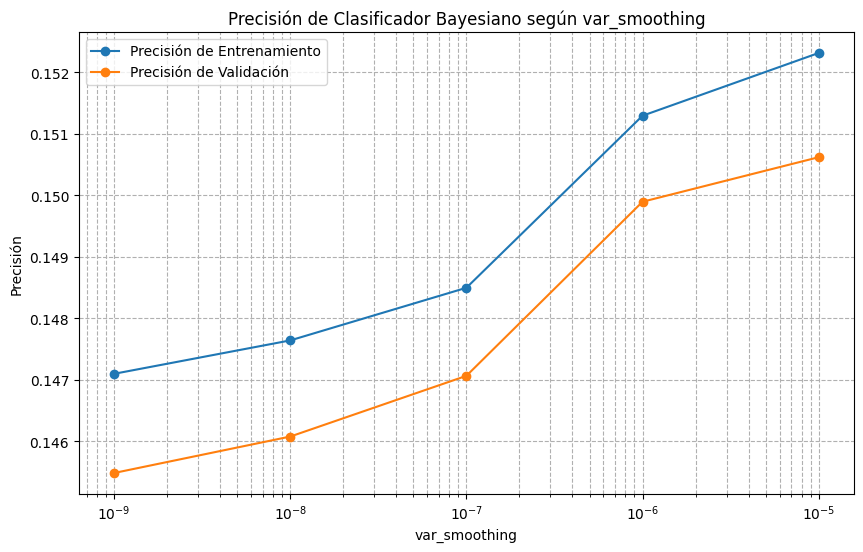

In [ ]:
# Graficar las precisiones de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(metrics_df_bayesian['var_smoothing'], metrics_df_bayesian['Train_Accuracy'], label='Precisión de Entrenamiento', marker='o')
plt.plot(metrics_df_bayesian['var_smoothing'], metrics_df_bayesian['Val_Accuracy'], label='Precisión de Validación', marker='o')
plt.xscale('log')  # Escala logarítmica para var_smoothing
plt.xlabel('var_smoothing')
plt.ylabel('Precisión')
plt.title('Precisión de Clasificador Bayesiano según var_smoothing')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

**AUC (Área Bajo la Curva)**

Ambos valores indican un desempeño cercano al azar (AUC ≈ 0.5), lo que sugiere que el modelo tiene poca capacidad para distinguir entre las clases.

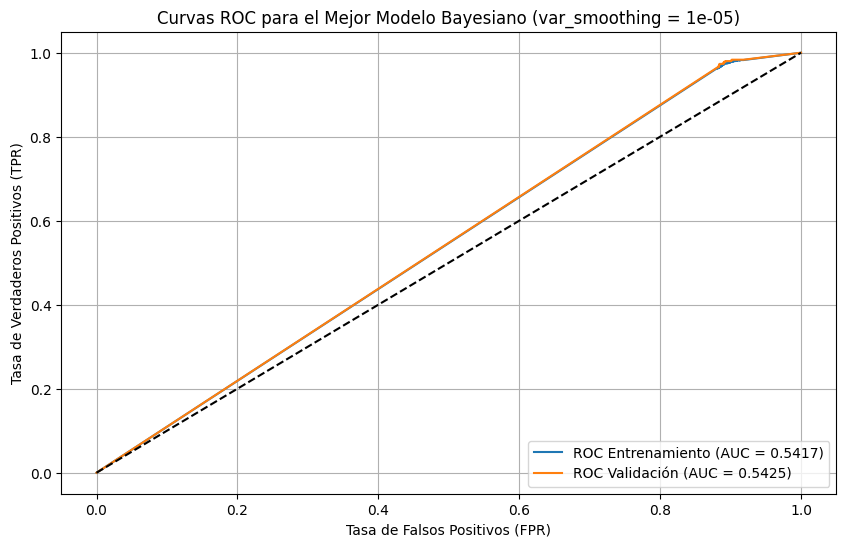

In [ ]:
# Generar curvas ROC para el mejor modelo
y_train_proba_best_bayesian = best_model_bayesian.predict_proba(X_train)[:, 1]
y_val_proba_best_bayesian = best_model_bayesian.predict_proba(X_val)[:, 1]

fpr_train_bayesian, tpr_train_bayesian, _ = roc_curve(y_train, y_train_proba_best_bayesian)
fpr_val_bayesian, tpr_val_bayesian, _ = roc_curve(y_val, y_val_proba_best_bayesian)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_bayesian, tpr_train_bayesian, label=f'ROC Entrenamiento (AUC = {metrics_df_bayesian.loc[metrics_df_bayesian["var_smoothing"] == best_var_smoothing, "Train_AUC"].values[0]:.4f})')
plt.plot(fpr_val_bayesian, tpr_val_bayesian, label=f'ROC Validación (AUC = {metrics_df_bayesian.loc[metrics_df_bayesian["var_smoothing"] == best_var_smoothing, "Val_AUC"].values[0]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curvas ROC para el Mejor Modelo Bayesiano (var_smoothing = {best_var_smoothing})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Matriz de confusión**

- Verdaderos Negativos (TN): 6,947 (clase 0 correctamente predicha como 0).
- Falsos Positivos (FP): 51,463 (clase 0 incorrectamente predicha como 1).
- Falsos Negativos (FN): 90 (clase 1 incorrectamente predicha como 0).
- Verdaderos Positivos (TP): 2,316 (clase 1 correctamente predicha como 1).

Esto indica que el modelo tiene una pobre especificidad, es decir, no distingue bien entre las clases, especialmente la clase mayoritaria.

La precisión es muy baja, ya que la mayoría de las predicciones positivas son incorrectas. Esto implica que el modelo no es confiable para clasificar correctamente instancias de la clase 1

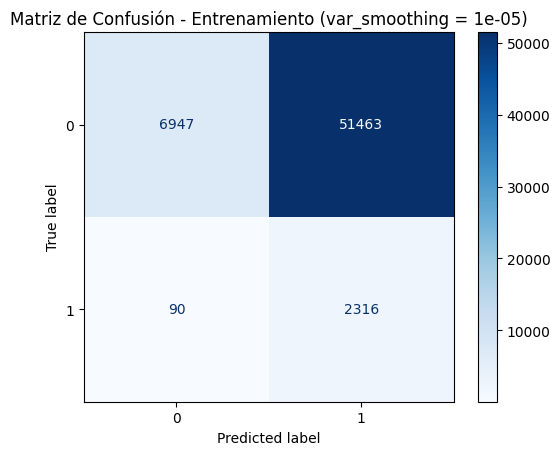

In [ ]:
cm_train_bayesian = confusion_matrix(y_train, best_model_bayesian.predict(X_train))
disp_train_bayesian = ConfusionMatrixDisplay(confusion_matrix=cm_train_bayesian, display_labels=best_model_bayesian.classes_)
disp_train_bayesian.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Entrenamiento (var_smoothing = {best_var_smoothing})')
plt.show()

- Verdaderos Negativos (TN): 1,709 (clase 0 correctamente predicha como 0).
- Falsos Positivos (FP): 12,893 (clase 0 incorrectamente predicha como 1).
- Falsos Negativos (FN): 21 (clase 1 incorrectamente predicha como 0).
- Verdaderos Positivos (TP): 581 (clase 1 correctamente predicha como 1).

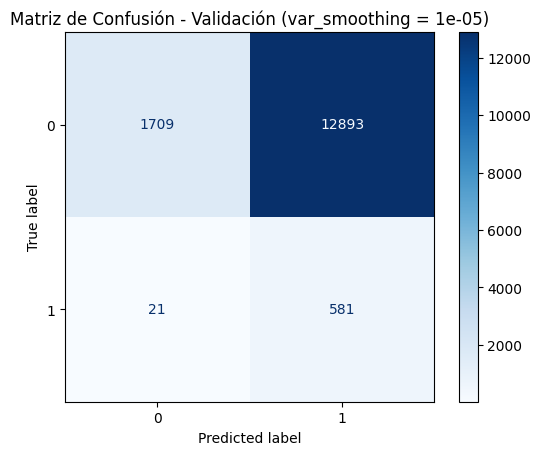

In [ ]:
# Para el conjunto de validación
cm_val_bayesian = confusion_matrix(y_val, best_model_bayesian.predict(X_val))
disp_val_bayesian = ConfusionMatrixDisplay(confusion_matrix=cm_val_bayesian, display_labels=best_model_bayesian.classes_)
disp_val_bayesian.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Validación (var_smoothing = {best_var_smoothing})')
plt.show()

In [ ]:
# Mostrar el DataFrame con las métricas
print("\nMétricas de Evaluación para cada configuración de Clasificador Bayesiano:")
display(metrics_df_bayesian)

# Mostrar el mejor modelo encontrado
print(f"\nMejor var_smoothing: {best_var_smoothing}")
print(f"Precisión de Validación: {best_val_accuracy:.4f}")

# Guardar el mejor modelo entrenado con joblib
joblib.dump(best_model_bayesian, 'best_bayesian_model.joblib')
print("\nEl mejor modelo ha sido guardado como 'best_bayesian_model.joblib'")


Métricas de Evaluación para cada configuración de Clasificador Bayesiano:


,Modelo,var_smoothing,Train_Precision,Train_Recall,Train_Accuracy,Train_F1,Train_AUC,Val_Precision,Val_Recall,Val_Accuracy,Val_F1,Val_AUC
0,Bayesiano,1.000000e-09,0.043016,0.967581,0.147099,0.082369,0.541158,0.043209,0.973422,0.145488,0.082745,0.542863
1,Bayesiano,1.000000e-08,0.043025,0.967165,0.147642,0.082385,0.540995,0.043238,0.973422,0.146080,0.082798,0.543302
2,Bayesiano,1.000000e-07,0.043032,0.966334,0.148497,0.082396,0.541356,0.043286,0.973422,0.147067,0.082885,0.543438
3,Bayesiano,1.000000e-06,0.043049,0.963425,0.151292,0.082416,0.541379,0.043288,0.970100,0.149895,0.082878,0.542450
4,Bayesiano,1.000000e-05,0.043065,0.962594,0.152312,0.082442,0.541723,0.043120,0.965116,0.150618,0.082552,0.542493



Mejor var_smoothing: 1e-05
Precisión de Validación: 0.1506

El mejor modelo ha sido guardado como 'best_bayesian_model.joblib'


## Modelo L1/L2 Penalty Logistic Regression con balanceo de clases SMOTEENN

Para el modelo de clasificación de regresión logística con penalización L1, L2 se hará una partición de los datos para poder aplicar el balanceo de clases.

In [ ]:
# Separar características y objetivo en el conjunto de entrenamiento
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_logistic, y_resampled_logistic = smoteenn.fit_resample(X_train, y_train)

In [ ]:
pipeline_l1l2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Manejo de valores faltantes
    ("scaler", StandardScaler()),  # Escalado de características
    ("classifier", LogisticRegression(solver="saga", max_iter=1000, random_state=42))  # Modelo base
])

In [ ]:

# Configurar hiperparámetros para GridSearch**
param_grid_l1l2 = [
    {"classifier__penalty": ["l1"], "classifier__C": [1, 0.1, 0.01]},  # Regularización L1
    {"classifier__penalty": ["l2"], "classifier__C": [1, 0.1, 0.01]},  # Regularización L2
]

# Crear y ejecutar el GridSearch con validación cruzada**
grid_l1l2 = GridSearchCV(
    pipeline_l1l2, param_grid_l1l2, cv=3, scoring="accuracy", verbose=2, return_train_score=True
)


In [ ]:
grid_l1l2.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............classifier__C=1, classifier__penalty=l1; total time= 5.4min
[CV] END ............classifier__C=1, classifier__penalty=l1; total time= 5.5min
[CV] END ............classifier__C=1, classifier__penalty=l1; total time= 5.3min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 5.2min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 5.2min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 5.2min
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time= 5.1min
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time= 5.1min
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time= 5.1min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 4.2min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 4.2min
[CV] END ............classifier__C=1, classifier_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           solver='saga'))]),
             param_grid=[{'classifier__C': [1, 0.1, 0.01],
                          'classifier__penalty': ['l1']},
                         {'classifier__C': [1, 0.1, 0.01],
                          'classifier__penalty': ['l2']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
# Imprimir los mejores hiperparámetros y la puntuación**
print("Mejores hiperparámetros encontrados para L1/L2:")
print(grid_l1l2.best_params_)
print(f"Mejor puntuación de validación para L1/L2: {grid_l1l2.best_score_:.6f}")

Mejores hiperparámetros encontrados para L1/L2:
{'classifier__C': 1, 'classifier__penalty': 'l2'}
Mejor puntuación de validación para L1/L2: 0.845739


In [ ]:
# Evaluar el modelo con el conjunto de prueba**
best_model_l1l2 = grid_l1l2.best_estimator_
y_pred_l1l2 = best_model_l1l2.predict(X_test)
y_pred_prob_l1l2 = best_model_l1l2.predict_proba(X_test)[:, 1]

In [ ]:
# Guardar el modelo en formato .pkl**
joblib.dump(best_model_l1l2, 'modelo_l1l2.pkl')
print("\nModelo guardado como 'modelo_l1l2.pkl'")


Modelo guardado como 'modelo_l1l2.pkl'


In [ ]:
# Métricas**
print("\nMétricas del modelo:")
accuracy = accuracy_score(y_test, y_pred_l1l2)
precision = precision_score(y_test, y_pred_l1l2)
recall = recall_score(y_test, y_pred_l1l2)
f1 = f1_score(y_test, y_pred_l1l2)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Métricas del modelo:
Accuracy: 0.8508
Precision: 0.8409
Recall: 0.8799
F1 Score: 0.8600


In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_l1l2)
print("\nMatriz de confusión:")
print(cm)


Matriz de confusión:
[[ 8694  1920]
 [ 1386 10151]]


- Verdaderos Negativos (TN): 8,694 (clase 0 correctamente predicha como 0).
- Falsos Positivos (FP): 1,920 (clase 0 incorrectamente predicha como 1).
- Falsos Negativos (FN): 1,386 (clase 1 incorrectamente predicha como 0).
- Verdaderos Positivos (TP): 10,151 (clase 1 correctamente predicha como 1).

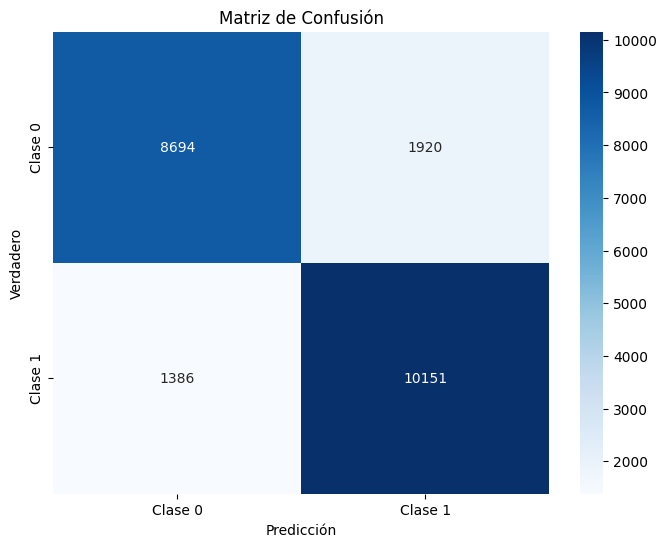

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

**Àrea bajo la curva ROC**

El modelo muestra un desempeño sólido, con buena precisión, recall y F1-Score. Sin embargo, para aplicaciones sensibles, es necesario reducir los falsos positivos y negativos

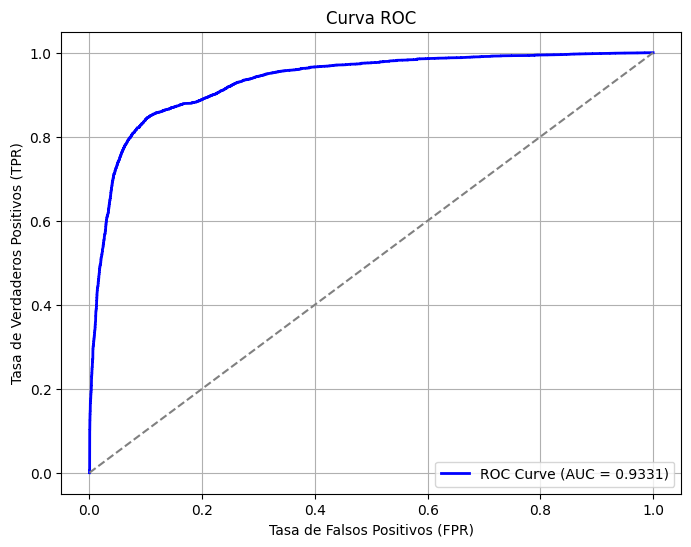

In [ ]:
# **8. Generar la curva ROC y calcular el AUC**
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_l1l2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Modelo de clasificación K-NN con balanceo de clases SMOTEENN

Se hace la particiòn de los datos y el balanceo de clases por cada partición para evitar fuga de datos.

In [ ]:
# Separar características y objetivo en el conjunto de entrenamiento
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_KNN, y_resampled_KNN = smoteenn.fit_resample(X_train, y_train)

# Lista de valores de n_neighbors a evaluar
neighbors_settings = range(1, 20)

# Crear una lista para almacenar las métricas
metrics_list = []

# Variables para rastrear el mejor modelo
best_val_accuracy = -np.inf
best_model = None
best_n_neighbors = None

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Iterar sobre los diferentes valores de n_neighbors con tqdm para mostrar el progreso
for n_neighbors in tqdm(neighbors_settings, desc="Evaluando KNN"):
    # Crear el pipeline con preprocesamiento y KNN
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
    ])

    # Entrenar el modelo con el conjunto resampleado
    pipeline.fit(X_resampled_KNN, y_resampled_KNN)

    # Predecir en el conjunto de entrenamiento original
    y_train_pred = pipeline.predict(X_train)
    y_train_proba = pipeline.predict_proba(X_train)[:, 1]

    # Calcular métricas para el conjunto de entrenamiento
    train_precision = precision_score(y_train, y_train_pred, average='binary')
    train_recall = recall_score(y_train, y_train_pred, average='binary')
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='binary')
    train_auc = roc_auc_score(y_train, y_train_proba)

    # Predecir en el conjunto de validación
    y_val_pred = pipeline.predict(X_val)
    y_val_proba = pipeline.predict_proba(X_val)[:, 1]

    # Calcular métricas para el conjunto de validación
    val_precision = precision_score(y_val, y_val_pred, average='binary')
    val_recall = recall_score(y_val, y_val_pred, average='binary')
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='binary')
    val_auc = roc_auc_score(y_val, y_val_proba)

    # Añadir las métricas a la lista
    metrics_list.append({
        'Modelo': 'K-NN',
        'n_neighbors': n_neighbors,
        'Train_Precision': train_precision,
        'Train_Recall': train_recall,
        'Train_Accuracy': train_accuracy,
        'Train_F1': train_f1,
        'Train_AUC': train_auc,
        'Val_Precision': val_precision,
        'Val_Recall': val_recall,
        'Val_Accuracy': val_accuracy,
        'Val_F1': val_f1,
        'Val_AUC': val_auc
    })

    # Verificar si este modelo es el mejor hasta ahora
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = pipeline
        best_n_neighbors = n_neighbors

    # Imprimir el progreso similar al ejemplo proporcionado
    print(f"n_neighbors: {n_neighbors}, Training Accuracy: {train_accuracy:.4f}, Validación Accuracy: {val_accuracy:.4f}")

# Convertir la lista de métricas a un DataFrame
metrics_df = pd.DataFrame(metrics_list)

Evaluando KNN:   5%|▌         | 1/19 [03:55<1:10:43, 235.75s/it]

n_neighbors: 1, Training Accuracy: 0.9314, Validación Accuracy: 0.8665


Evaluando KNN:  11%|█         | 2/19 [07:44<1:05:41, 231.86s/it]

n_neighbors: 2, Training Accuracy: 0.9349, Validación Accuracy: 0.8904


Evaluando KNN:  16%|█▌        | 3/19 [11:56<1:04:17, 241.08s/it]

n_neighbors: 3, Training Accuracy: 0.8932, Validación Accuracy: 0.8564


Evaluando KNN:  21%|██        | 4/19 [15:45<59:04, 236.28s/it]  

n_neighbors: 4, Training Accuracy: 0.9045, Validación Accuracy: 0.8726


Evaluando KNN:  26%|██▋       | 5/19 [19:34<54:31, 233.66s/it]

n_neighbors: 5, Training Accuracy: 0.8770, Validación Accuracy: 0.8494


Evaluando KNN:  32%|███▏      | 6/19 [23:25<50:23, 232.54s/it]

n_neighbors: 6, Training Accuracy: 0.8889, Validación Accuracy: 0.8642


Evaluando KNN:  37%|███▋      | 7/19 [27:11<46:07, 230.61s/it]

n_neighbors: 7, Training Accuracy: 0.8675, Validación Accuracy: 0.8435


Evaluando KNN:  42%|████▏     | 8/19 [31:02<42:15, 230.51s/it]

n_neighbors: 8, Training Accuracy: 0.8789, Validación Accuracy: 0.8570


Evaluando KNN:  47%|████▋     | 9/19 [34:52<38:24, 230.46s/it]

n_neighbors: 9, Training Accuracy: 0.8616, Validación Accuracy: 0.8400


Evaluando KNN:  53%|█████▎    | 10/19 [38:40<34:26, 229.66s/it]

n_neighbors: 10, Training Accuracy: 0.8710, Validación Accuracy: 0.8514


Evaluando KNN:  58%|█████▊    | 11/19 [42:30<30:37, 229.68s/it]

n_neighbors: 11, Training Accuracy: 0.8562, Validación Accuracy: 0.8374


Evaluando KNN:  63%|██████▎   | 12/19 [46:18<26:45, 229.39s/it]

n_neighbors: 12, Training Accuracy: 0.8663, Validación Accuracy: 0.8487


Evaluando KNN:  68%|██████▊   | 13/19 [50:07<22:55, 229.23s/it]

n_neighbors: 13, Training Accuracy: 0.8533, Validación Accuracy: 0.8349


Evaluando KNN:  74%|███████▎  | 14/19 [53:56<19:05, 229.19s/it]

n_neighbors: 14, Training Accuracy: 0.8624, Validación Accuracy: 0.8457


Evaluando KNN:  79%|███████▉  | 15/19 [57:44<15:14, 228.62s/it]

n_neighbors: 15, Training Accuracy: 0.8503, Validación Accuracy: 0.8333


Evaluando KNN:  84%|████████▍ | 16/19 [1:01:32<11:25, 228.65s/it]

n_neighbors: 16, Training Accuracy: 0.8582, Validación Accuracy: 0.8440


Evaluando KNN:  89%|████████▉ | 17/19 [1:05:19<07:35, 227.94s/it]

n_neighbors: 17, Training Accuracy: 0.8481, Validación Accuracy: 0.8343


Evaluando KNN:  95%|█████████▍| 18/19 [1:09:07<03:48, 228.08s/it]

n_neighbors: 18, Training Accuracy: 0.8575, Validación Accuracy: 0.8443


Evaluando KNN: 100%|██████████| 19/19 [1:12:56<00:00, 230.34s/it]

n_neighbors: 19, Training Accuracy: 0.8485, Validación Accuracy: 0.8345


**Comportamiento entre el score del conjunto de entrenamiento y validación**.

A medida que aumenta k, la precisión de entrenamiento disminuye debido a menor sobreajuste, mientras que la de validación inicialmente mejora y luego disminuye. La mejor precisión de validación ocurre para valores bajos de k, pero más grandes que 1, indicando que valores muy pequeños de k tienden a sobreajustar

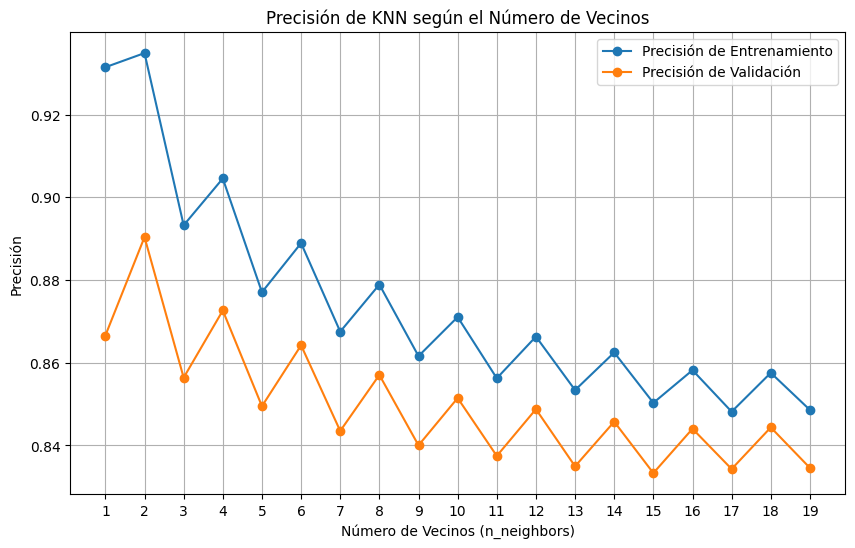

In [ ]:
# Graficar las precisiones de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['n_neighbors'], metrics_df['Train_Accuracy'], label='Precisión de Entrenamiento', marker='o')
plt.plot(metrics_df['n_neighbors'], metrics_df['Val_Accuracy'], label='Precisión de Validación', marker='o')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Precisión')
plt.title('Precisión de KNN según el Número de Vecinos')
plt.legend()
plt.grid(True)
plt.xticks(neighbors_settings)
plt.show()

El AUC (Área Bajo la Curva) es de `0.9028` para entrenamiento, indicando un excelente desempeño predictivo en ese conjunto. Sin embargo, el AUC en validación es menor, 0.6713, sugiriendo que el modelo no generaliza bien y puede estar sobreajustado

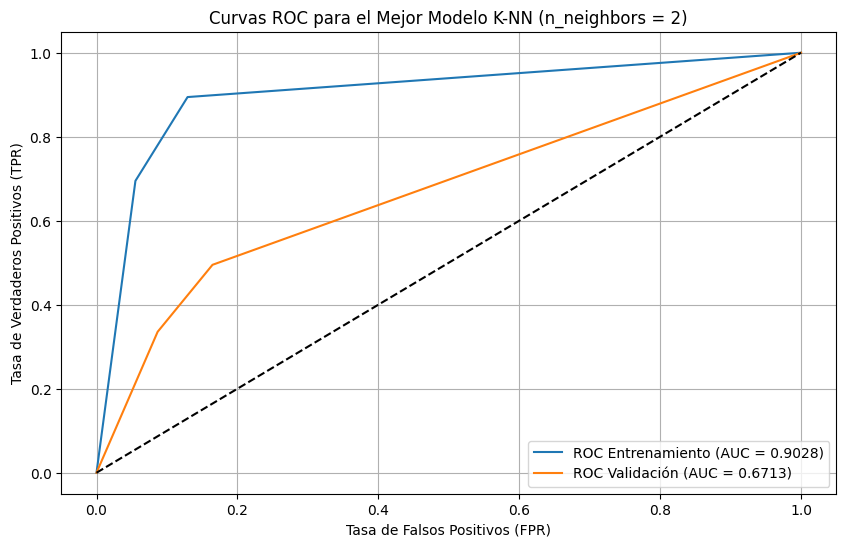

In [ ]:
# Generar curvas ROC para el mejor modelo
y_train_proba_best = best_model.predict_proba(X_train)[:, 1]
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba_best)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC Entrenamiento (AUC = {metrics_df.loc[metrics_df["n_neighbors"] == best_n_neighbors, "Train_AUC"].values[0]:.4f})')
plt.plot(fpr_val, tpr_val, label=f'ROC Validación (AUC = {metrics_df.loc[metrics_df["n_neighbors"] == best_n_neighbors, "Val_AUC"].values[0]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curvas ROC para el Mejor Modelo K-NN (n_neighbors = {best_n_neighbors})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Matriz de confusión**

- Verdaderos Negativos (TN): 55,183 (clase 0 correctamente predicha como 0).
- Falsos Positivos (FP): 3,227 (clase 0 predicha incorrectamente como 1).
- Falsos Negativos (FN): 734 (clase 1 predicha incorrectamente como 0).
- Verdaderos Positivos (TP): 1,672 (clase 1 correctamente predicha como 1

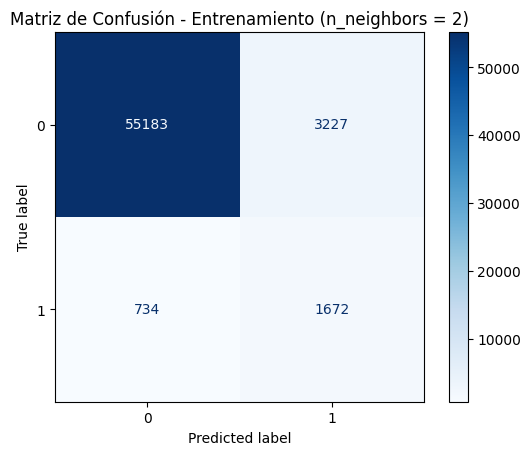

In [ ]:
# Generar matrices de confusión para el mejor modelo
# Para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, best_model.predict(X_train))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_model.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Entrenamiento (n_neighbors = {best_n_neighbors})')
plt.show()

- Verdaderos Negativos (TN): 13,335 (clase 0 correctamente predicha como 0).
- Falsos Positivos (FP): 1,267 (clase 0 predicha incorrectamente como 1).
- Falsos Negativos (FN): 400 (clase 1 predicha incorrectamente como 0).
- Verdaderos Positivos (TP): 202 (clase 1 correctamente predicha como 1).

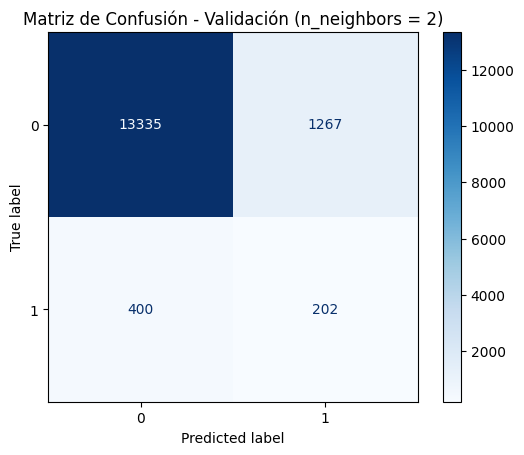

In [ ]:
# Para el conjunto de validación
cm_val = confusion_matrix(y_val, best_model.predict(X_val))
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_model.classes_)
disp_val.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Validación (n_neighbors = {best_n_neighbors})')
plt.show()

In [ ]:
# Mostrar el DataFrame con las métricas
print("\nMétricas de Evaluación para cada configuración de KNN:")
display(metrics_df)


Métricas de Evaluación para cada configuración de KNN:


,Modelo,n_neighbors,Train_Precision,Train_Recall,Train_Accuracy,Train_F1,Train_AUC,Val_Precision,Val_Recall,Val_Accuracy,Val_F1,Val_AUC
0,K-NN,1,0.353255,0.881962,0.931449,0.504457,0.907725,0.124276,0.392027,0.866548,0.188725,0.639069
1,K-NN,2,0.341294,0.694929,0.934869,0.457769,0.902791,0.137509,0.335548,0.890358,0.195075,0.671336
2,K-NN,3,0.234614,0.751039,0.893219,0.357539,0.896009,0.124763,0.436877,0.856354,0.194096,0.687842
3,K-NN,4,0.248521,0.698254,0.904532,0.366572,0.891076,0.136636,0.416944,0.872599,0.205822,0.700922
4,K-NN,5,0.204336,0.728595,0.877022,0.319162,0.886713,0.125942,0.471761,0.849448,0.198810,0.706300
5,K-NN,6,0.216103,0.688279,0.888894,0.328930,0.882355,0.134798,0.448505,0.864180,0.207294,0.712295
6,K-NN,7,0.189430,0.716542,0.867486,0.299644,0.879069,0.122986,0.481728,0.843462,0.195946,0.719794
7,K-NN,8,0.199175,0.682461,0.878881,0.308357,0.875461,0.129595,0.456811,0.857011,0.201909,0.724135
8,K-NN,9,0.180737,0.707398,0.861566,0.287913,0.872537,0.122785,0.495017,0.839976,0.196765,0.730154
9,K-NN,10,0.188331,0.682876,0.871021,0.295238,0.869502,0.129638,0.481728,0.851421,0.204297,0.733799


In [ ]:
# Mostrar el mejor modelo encontrado
print(f"\nMejor n_neighbors: {best_n_neighbors}")
print(f"Precisión de Validación: {best_val_accuracy:.4f}")

# Guardar el mejor modelo entrenado con joblib
joblib.dump(best_model, 'best_knn_model.joblib')
print("\nEl mejor modelo ha sido guardado como 'best_knn_model.joblib'")


Mejor n_neighbors: 2
Precisión de Validación: 0.8904

El mejor modelo ha sido guardado como 'best_knn_model.joblib'


In [ ]:
test_data = test_data[X.columns]

# Realizar predicciones de clase
test_predictions = best_model.predict(test_data)

# Realizar predicciones de probabilidad (opcional)
test_proba = best_model.predict_proba(test_data)[:, 1]

In [ ]:
if 'id' in test_data.columns:
    test_results = pd.DataFrame({
        'id': test_data['id'],
        'Predicted_TARGET': test_predictions,
        'Predicted_PROBA': test_proba
    })
else:
    test_results = pd.DataFrame({
        'Row_Index': test_data.index,
        'Predicted_TARGET': test_predictions,
        'Predicted_PROBA': test_proba
    })

# Mostrar las primeras filas de las predicciones
print("\nPrimeras filas de las predicciones en el conjunto de test:")
display(test_results.head())

# Guardar las predicciones en un archivo CSV
test_results.to_csv('test_predictions.csv', index=False)
print("\nLas predicciones en el conjunto de test han sido guardadas como 'test_predictions.csv'.")

# (Opcional) Descargar el archivo CSV en Google Colab
from google.colab import files
files.download('test_predictions.csv')


Primeras filas de las predicciones en el conjunto de test:


,Row_Index,Predicted_TARGET,Predicted_PROBA
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0



Las predicciones en el conjunto de test han sido guardadas como 'test_predictions.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## XGBoost con balanceo de clase SMOTEENN

Se realiza balanceo de clases posterior a la partición o división de conjuntos de entrenamiento y validacion.

In [ ]:
# Separar características y objetivo en el conjunto de entrenamiento
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_xgb, y_resampled_xgb = smoteenn.fit_resample(X_train, y_train)


In [ ]:
param_grid = {
    'xgbclassifier__n_estimators': [100, 200],        # Número de árboles
    'xgbclassifier__max_depth': [3, 6],              # Profundidad máxima de los árboles
    'xgbclassifier__learning_rate': [0.1, 0.01],     # Tasa de aprendizaje
    'xgbclassifier__subsample': [0.8, 1],            # Submuestreo de muestras
    'xgbclassifier__colsample_bytree': [0.8, 1]      # Submuestreo de columnas
}

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Crear el pipeline con preprocesamiento y XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgbclassifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

In [ ]:
# Configurar GridSearchCV para la búsqueda de hiperparámetros
grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid,
    cv=3,                      # Número de pliegues en la validación cruzada
    scoring='accuracy',        # Métrica a optimizar
    verbose=2
)

In [ ]:
# Entrenar el modelo con el conjunto resampleado
grid_search_xgb.fit(X_resampled_xgb, y_resampled_xgb)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8; total time=  12.9s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8; total time=   8.4s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8; total time=   3.3s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100, xgbclassifier__subsample=1; total time=   3.2s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100, xgbclassifier__subsample=1; total time= 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['imp_ent_var16_ult1',
                                                                          'imp_op_var40_comer_ult1',
                                                                          'imp_op_var40_comer_ult3',
                                                                          'imp_op_var40_efect_ult1',
                                                                          'imp_op_var40_efect_ult3',
                                                                          'imp_op_var40_ult1',
                                                                          'imp_op_var41_comer_ult1',
                                                                          'imp_op_var41_comer_ult3',
                                                                          'imp_op...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1],
                         'xgbclassifier__learning_rate': [0.1, 0.01],
                         'xgbclassifier__max_depth': [3, 6],
                         'xgbclassifier__n_estimators': [100, 200],
                         'xgbclassifier__subsample': [0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
# Obtener el mejor modelo
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_val_accuracy_xgb = grid_search_xgb.best_score_

`Mejores parámetros`

- `colsample_bytree`: 0.8: Utiliza el 80% de las características en cada árbol para mejorar la diversidad.
- `learning_rate`: 0.1: Tasa de aprendizaje moderada para un ajuste gradual.
- `max_depth`: 6: Árboles con profundidad controlada para evitar sobreajuste.
- `n_estimators`: 200: Construcción de 200 árboles para capturar patrones complejos.
- `subsample`: 0.8: Usa el 80% de las observaciones para entrenar cada árbol.

In [ ]:
print(f"Mejores parámetros para XGBoost: {best_params_xgb}")
print(f"Mejor precisión de validación en cross-validation: {best_val_accuracy_xgb:.4f}")

Mejores parámetros para XGBoost: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 0.8}
Mejor precisión de validación en cross-validation: 0.9559


In [ ]:
# Evaluar el mejor modelo en el conjunto de validación
y_val_pred_xgb = best_model_xgb.predict(X_val)
y_val_proba_xgb = best_model_xgb.predict_proba(X_val)[:, 1]

In [ ]:
# Calcular métricas para el conjunto de validación
val_precision_xgb = precision_score(y_val, y_val_pred_xgb, average='binary')
val_recall_xgb = recall_score(y_val, y_val_pred_xgb, average='binary')
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
val_f1_xgb = f1_score(y_val, y_val_pred_xgb, average='binary')
val_auc_xgb = roc_auc_score(y_val, y_val_proba_xgb)

# Almacenar el AUC en una variable específica
auc_xgb = val_auc_xgb

# Imprimir las métricas
print("\nMétricas de Evaluación en el Conjunto de Validación:")
print(f"Precisión: {val_precision_xgb:.4f}")
print(f"Recall: {val_recall_xgb:.4f}")
print(f"Accuracy: {val_accuracy_xgb:.4f}")
print(f"F1-Score: {val_f1_xgb:.4f}")
print(f"AUC: {val_auc_xgb:.4f}")


Métricas de Evaluación en el Conjunto de Validación:
Precisión: 0.1823
Recall: 0.5000
Accuracy: 0.8914
F1-Score: 0.2672
AUC: 0.8331


**Precición media vs Learning Rate para estimadores diferentes de XGBoost**

- `n_estimators`=200 consistentemente supera a n_estimators=100 en todas las tasas de aprendizaje, logrando una mejor precisión.
- A medida que el learning rate aumenta, la precisión media CV mejora para ambos valores de n_estimators.

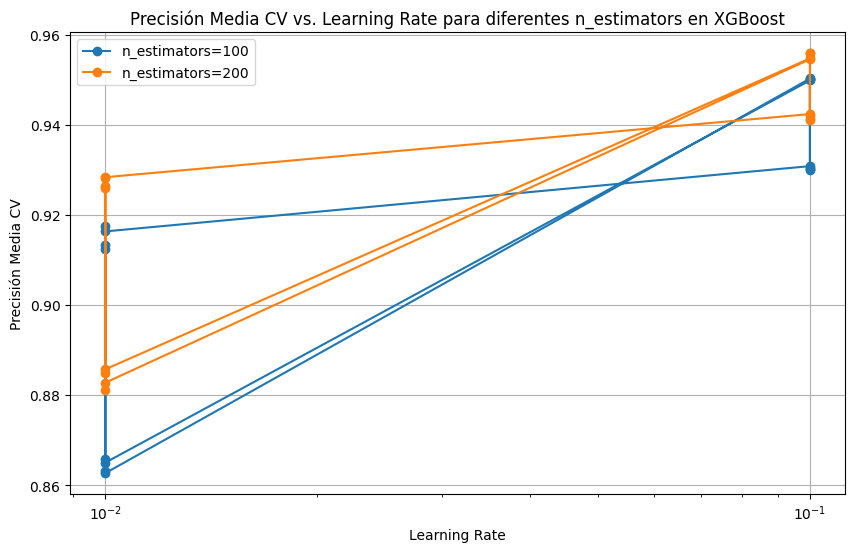

In [ ]:
# Visualizar los resultados de GridSearch
results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
plt.figure(figsize=(10, 6))
for est in param_grid['xgbclassifier__n_estimators']:
    subset = results_xgb[results_xgb['param_xgbclassifier__n_estimators'] == est]
    plt.plot(subset['param_xgbclassifier__learning_rate'], subset['mean_test_score'], label=f'n_estimators={est}', marker='o')

plt.xscale('log')  # Escala logarítmica para learning_rate
plt.xlabel('Learning Rate')
plt.ylabel('Precisión Media CV')
plt.title('Precisión Media CV vs. Learning Rate para diferentes n_estimators en XGBoost')
plt.legend()
plt.grid(True)
plt.show()

**Curva de ROC**

La curva se aproxima al vértice superior izquierdo, lo que refleja una buena combinación de Tasa de Verdaderos Positivos (TPR) y baja Tasa de Falsos Positivos (FPR)

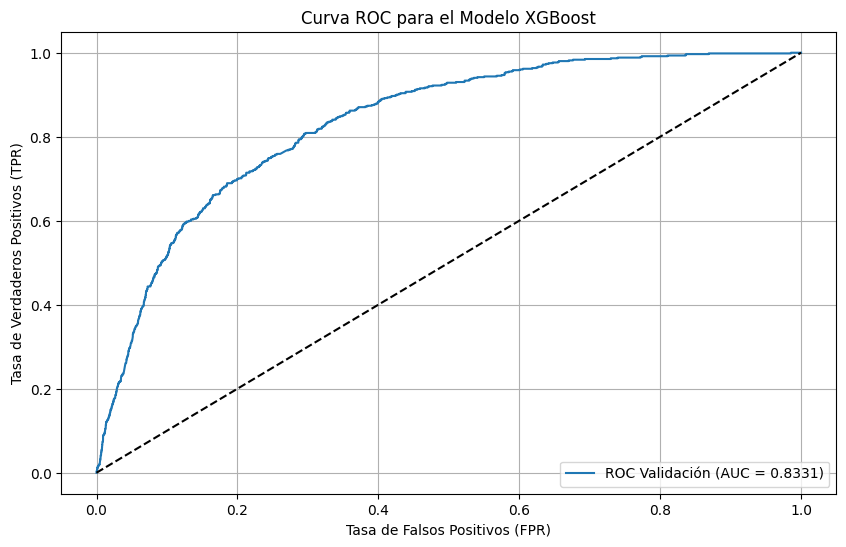

In [ ]:
# Generar curva ROC para el conjunto de validación
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_val_proba_xgb)
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Validación (AUC = {val_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para el Modelo XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Verdaderos Negativos (TN): 13,252 Observaciones de la clase 0 correctamente clasificadas como 0.
- Falsos Positivos (FP): 1,350 Observaciones de la clase 0 incorrectamente clasificadas como 1.
- Falsos Negativos (FN): 301 Observaciones de la clase 1 incorrectamente clasificadas como 0.
- Verdaderos Positivos (TP): 301 Observaciones de la clase 1 correctamente clasificadas como 1.

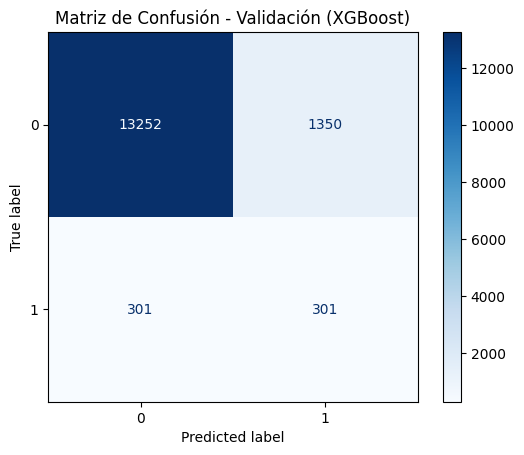

In [ ]:
# Generar matriz de confusión para el conjunto de validación
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_model_xgb.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Validación (XGBoost)')
plt.show()


In [ ]:
# Mostrar el DataFrame con las métricas de GridSearch
print("\nMétricas de Evaluación para cada configuración de XGBoost:")
display(results_xgb[['param_xgbclassifier__n_estimators',
                    'param_xgbclassifier__max_depth',
                    'param_xgbclassifier__learning_rate',
                    'param_xgbclassifier__subsample',
                    'param_xgbclassifier__colsample_bytree',
                    'mean_test_score',
                    'std_test_score',
                    'rank_test_score']])


Métricas de Evaluación para cada configuración de XGBoost:


,param_xgbclassifier__n_estimators,param_xgbclassifier__max_depth,param_xgbclassifier__learning_rate,param_xgbclassifier__subsample,param_xgbclassifier__colsample_bytree,mean_test_score,std_test_score,rank_test_score
0,100,3,0.10,0.8,0.8,0.930353,0.011723,14
1,100,3,0.10,1.0,0.8,0.929988,0.011392,16
2,200,3,0.10,0.8,0.8,0.941877,0.012911,10
3,200,3,0.10,1.0,0.8,0.941363,0.013003,11
4,100,6,0.10,0.8,0.8,0.950200,0.013366,7
5,100,6,0.10,1.0,0.8,0.950246,0.013229,6
6,200,6,0.10,0.8,0.8,0.955905,0.014490,1
7,200,6,0.10,1.0,0.8,0.954545,0.013989,4
8,100,3,0.01,0.8,0.8,0.862719,0.006700,32
9,100,3,0.01,1.0,0.8,0.863153,0.006912,31


In [ ]:
# Mostrar el mejor modelo encontrado
print(f"\nMejores Parámetros para XGBoost:")
print(f"n_estimators: {best_params_xgb['xgbclassifier__n_estimators']}")
print(f"max_depth: {best_params_xgb['xgbclassifier__max_depth']}")
print(f"learning_rate: {best_params_xgb['xgbclassifier__learning_rate']}")
print(f"subsample: {best_params_xgb['xgbclassifier__subsample']}")
print(f"colsample_bytree: {best_params_xgb['xgbclassifier__colsample_bytree']}")
print(f"Precisión de Validación: {val_accuracy_xgb:.4f}")
print(f"AUC Guardado en 'auc_xgb': {auc_xgb:.4f}")


Mejores Parámetros para XGBoost:
n_estimators: 200
max_depth: 6
learning_rate: 0.1
subsample: 0.8
colsample_bytree: 0.8
Precisión de Validación: 0.8914
AUC Guardado en 'auc_xgb': 0.8331


In [ ]:
# Guardar el mejor modelo entrenado con joblib
joblib.dump(best_model_xgb, 'best_xgboost_model.joblib')
print("\nEl mejor modelo de XGBoost ha sido guardado como 'best_xgboost_model.joblib'")


El mejor modelo de XGBoost ha sido guardado como 'best_xgboost_model.joblib'


## Modelo Suport Vector Machine (SVM) con balanceo de clases SMOTEENN

El modelo SVM (Support Vector Machines) es una técnica de clasificación que busca encontrar el mejor hiperplano que separe dos clases maximizando la distancia entre ellas (margen):
Se realiza inicalmente un proceso de balanceo de clases con el método de undersampling de clase mayoritaria y oversampling de clase minoritaria.

In [17]:
# Separar características y objetivo en el conjunto de entrenamiento
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_svm, y_resampled_svm = smoteenn.fit_resample(X_train, y_train)

In [19]:
param_grid = {
    'svc__C': [0.1, 1, 10],                    # Parámetro de regularización
    'svc__kernel': ['linear', 'rbf'],         # Tipo de kernel
    'svc__gamma': ['scale', 'auto'],          # Parámetro de kernel para 'rbf'
    'pca__n_components': [0.95, 0.99]         # Variancia explicada por PCA
}

In [20]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [21]:
pipeline_svm_pca = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),                             # PCA para reducción de dimensionalidad
    ('smoteenn', SMOTEENN(random_state=42)),    # Balanceo de clases
    ('classifier', LinearSVC(random_state=42, max_iter=10000))  # Clasificador SVM lineal
])


param_dist_svm = {
    'pca__n_components': [0.70, 0.80, 0.90],  # Varianza explicada por PCA
    'classifier__C': [0.1, 1, 10]              # Parámetro de regularización
}

In [22]:
# Configurar GridSearchCV para la búsqueda de hiperparámetros
grid_search_svm = GridSearchCV(
    estimator=pipeline_svm_pca,
    param_grid=param_grid,
    cv=3,                      # Número de pliegues en la validación cruzada
    scoring='accuracy',        # Métrica a optimizar
    verbose=2
)

In [23]:
model_filename = "best_svm_model_pca_optimized.pkl"

if os.path.exists(model_filename):
    print(f"\nEl modelo ya existe. Cargando desde {model_filename}...")
    best_svm_model = joblib.load(model_filename)
else:
    print("\nEl modelo no existe. Entrenando un nuevo modelo...")

    # Optimización de hiperparámetros con RandomizedSearchCV
    randomized_search_svm = RandomizedSearchCV(
        pipeline_svm_pca,
        param_distributions=param_dist_svm,
        n_iter=5,                     # Número de iteraciones
        cv=3,                         # Número de pliegues en la validación cruzada
        scoring='accuracy',           # Métrica a optimizar
        verbose=1,
        random_state=42
    )

    # Entrenar el modelo con el conjunto de entrenamiento
    randomized_search_svm.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_svm_model = randomized_search_svm.best_estimator_
    best_params_svm = randomized_search_svm.best_params_
    best_val_accuracy_svm = randomized_search_svm.best_score_

    print(f"\nMejores parámetros seleccionados: {best_params_svm}")
    print(f"Mejor precisión de validación en cross-validation: {best_val_accuracy_svm:.4f}")

    # Guardar el mejor modelo
    joblib.dump(best_svm_model, model_filename)
    print(f"\nModelo guardado como {model_filename}")


El modelo no existe. Entrenando un nuevo modelo...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Mejores parámetros seleccionados: {'pca__n_components': 0.7, 'classifier__C': 0.1}
Mejor precisión de validación en cross-validation: 0.6738

Modelo guardado como best_svm_model_pca_optimized.pkl


In [24]:
# Realizar predicciones en el conjunto de validación
y_val_pred_svm = best_svm_model.predict(X_val)

# Obtener scores para AUC utilizando decision_function
y_val_scores = best_svm_model.decision_function(X_val)
val_auc_svm = roc_auc_score(y_val, y_val_scores)

# Calcular métricas para el conjunto de validación
val_precision_svm = precision_score(y_val, y_val_pred_svm, average='binary')
val_recall_svm = recall_score(y_val, y_val_pred_svm, average='binary')
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
val_f1_svm = f1_score(y_val, y_val_pred_svm, average='binary')

In [25]:
print("Métricas en el conjunto de validación:")
print(f"Precision: {val_precision_svm:.4f}")
print(f"Recall: {val_recall_svm:.4f}")
print(f"Accuracy: {val_accuracy_svm:.4f}")
print(f"F1-Score: {val_f1_svm:.4f}")
print(f"AUC: {val_auc_svm:.4f}")

Métricas en el conjunto de validación:
Precision: 0.0849
Recall: 0.7375
Accuracy: 0.6750
F1-Score: 0.1523
AUC: 0.7814


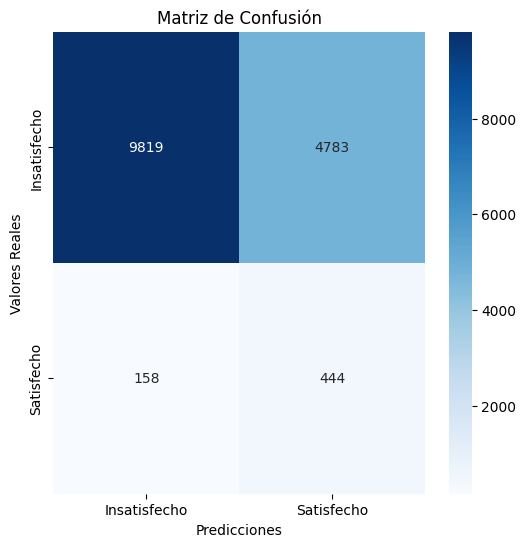

In [28]:
# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred_svm)
print("\nMatriz de confusión:")
print(cm)

# Crear la visualización con etiquetas y un formato más claro
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Insatisfecho", "Satisfecho"], yticklabels=["Insatisfecho", "Satisfecho"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

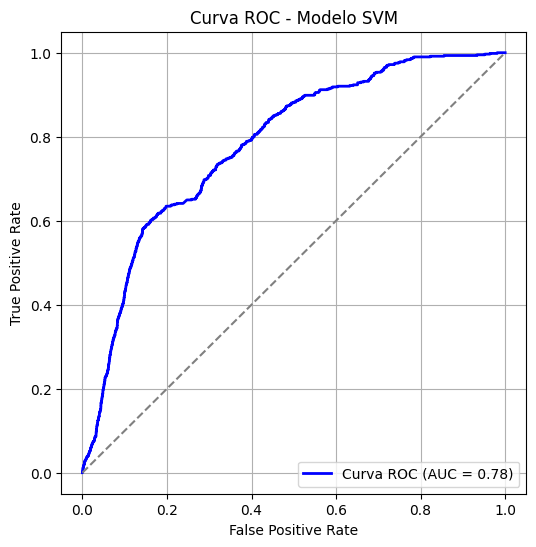

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores)  # Calcular FPR y TPR
roc_auc = auc(fpr, tpr)  # Calcular AUC

# Crear la gráfica ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Modelo Random Forest con balanceo de clases SMOTEENN

Para el modleo de RF se dividen los datos y se balancean las clases dld conjunto d entrenamieto.

In [ ]:
# Separar características y objetivo en el conjunto de entrenamiento
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTEENN solo al conjunto de entrenamiento
smoteenn = SMOTEENN(random_state=42)
X_resampled_rf, y_resampled_rf = smoteenn.fit_resample(X_train, y_train)


In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Escalado de características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Codificación one-hot
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# **Crear el Pipeline con preprocesamiento y Random Forest**
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesador compuesto
    ('classifier', RandomForestClassifier(random_state=42))  # Clasificador Random Forest
])

# **Definir el espacio de hiperparámetros optimizado**
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árboles
    'classifier__max_depth': [10, 20, None],  # Profundidad máxima
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir
    'classifier__min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en hojas
}

**Evaluacion de mejores hiperparametros del modelo.**

 Los mejores hiperparámetros encontrados son: max_depth=None (sin límite de profundidad), min_samples_leaf=1 (mínimo de una muestra por hoja), min_samples_split=2 (mínimo de dos muestras para dividir un nodo) y n_estimators=200 (200 árboles).

In [ ]:
model_filename = "best_rf_model.pkl"

if os.path.exists(model_filename):
    print(f"El modelo ya existe. Cargando desde {model_filename}...")
    best_rf_model = joblib.load(model_filename)
else:
    print("El modelo no existe. Entrenando un nuevo modelo...")
    # Crear el GridSearchCV con validación cruzada
    grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring="roc_auc", n_jobs=-1, verbose=2)
    grid_rf.fit(X_resampled_rf, y_resampled_rf)  # Usar datos balanceados de entrenamiento

    # Guardar el mejor modelo
    best_rf_model = grid_rf.best_estimator_
    joblib.dump(best_rf_model, model_filename)
    print(f"Modelo guardado como {model_filename}")

    # Resultados del modelo
    print("Mejores hiperparámetros encontrados:")
    print(grid_rf.best_params_)
    print(f"\nMejor puntuación de validación (AUC): {grid_rf.best_score_:.6f}")

El modelo no existe. Entrenando un nuevo modelo...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Modelo guardado como best_rf_model.pkl
Mejores hiperparámetros encontrados:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Mejor puntuación de validación (AUC): 0.993898


In [ ]:
# Realizar predicciones en el conjunto de validación
y_val_pred_rf = best_rf_model.predict(X_val)
y_val_proba_rf = best_rf_model.predict_proba(X_val)[:, 1]

# Calcular métricas para el conjunto de validación
val_precision_rf = precision_score(y_val, y_val_pred_rf, average='binary')
val_recall_rf = recall_score(y_val, y_val_pred_rf, average='binary')
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf, average='binary')
val_auc_rf = roc_auc_score(y_val, y_val_proba_rf)

# Imprimir las métricas
print("\nMétricas de Evaluación en el Conjunto de Validación:")
print(f"Precisión: {val_precision_rf:.4f}")
print(f"Recall: {val_recall_rf:.4f}")
print(f"Accuracy: {val_accuracy_rf:.4f}")
print(f"F1-Score: {val_f1_rf:.4f}")
print(f"AUC: {val_auc_rf:.4f}")


Métricas de Evaluación en el Conjunto de Validación:
Precisión: 0.1804
Recall: 0.3887
Accuracy: 0.9059
F1-Score: 0.2464
AUC: 0.8002


El modelo Random Forest tiene un desempeño sobresaliente con AUC > 0.970 en todas las configuraciones. La mejor combinación es con un número elevado de árboles (n_estimators=200) y una profundidad máxima mayor, lo que logra capturar mejor las relaciones sin comprometer la generalización. Sin embargo, profundidades mayores a 20 parecen no aportar mejoras significativas adicionales.

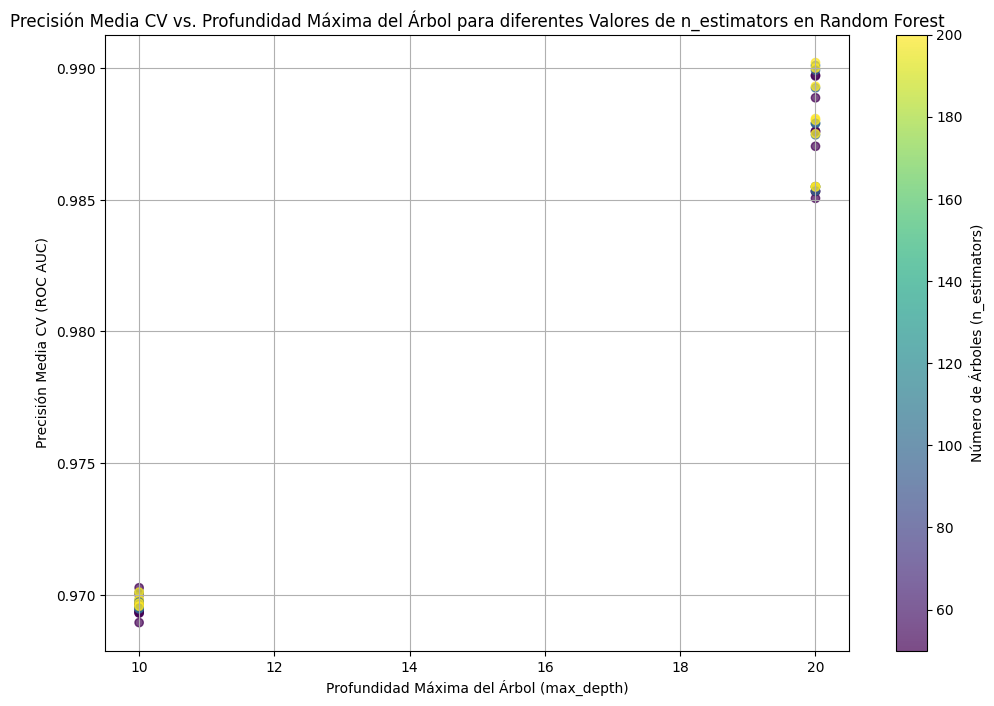

In [ ]:
results_rf = pd.DataFrame(grid_rf.cv_results_)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    results_rf['param_classifier__max_depth'],
    results_rf['mean_test_score'],
    c=results_rf['param_classifier__n_estimators'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Número de Árboles (n_estimators)')
plt.xlabel('Profundidad Máxima del Árbol (max_depth)')
plt.ylabel('Precisión Media CV (ROC AUC)')
plt.title('Precisión Media CV vs. Profundidad Máxima del Árbol para diferentes Valores de n_estimators en Random Forest')
plt.grid(True)
plt.show()

Àrea bajo la curva
- AUC = 0.8002 (80.02%)
La curva se eleva rápidamente en las primeras etapas, indicando que el modelo mantiene una buena Tasa de Verdaderos Positivos (TPR) incluso con bajos Falsos Positivos (FPR).

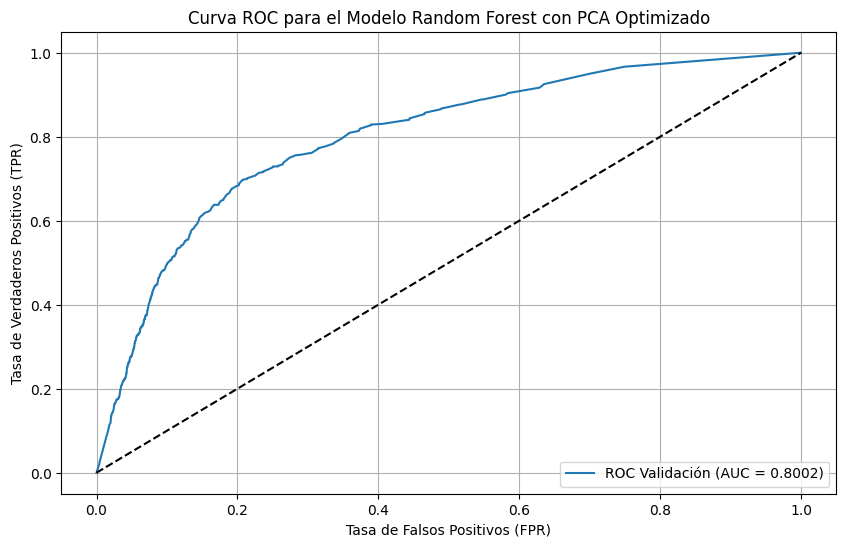

In [ ]:
# Generar curva ROC para el conjunto de validación
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_val_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Validación (AUC = {val_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para el Modelo Random Forest con PCA Optimizado')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Matriz de confusión

- Verdaderos Negativos (TN): 13,539
- Falsos Negativos (FN): 368
- Falsos Positivos (FP): 1,063
- Verdaderos Positivos (TP): 234


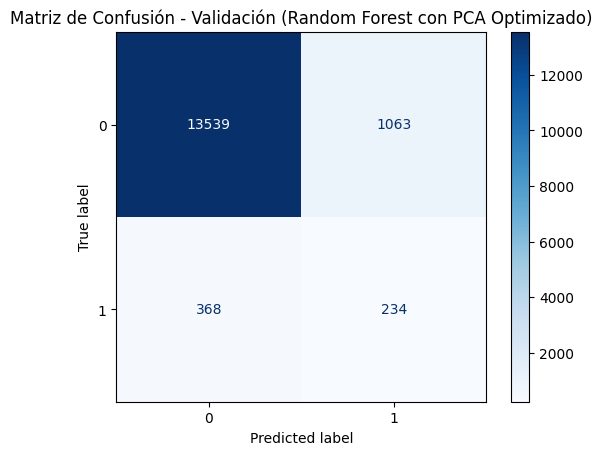

In [ ]:
# Generar matriz de confusión para el conjunto de validación
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.named_steps['classifier'].classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Validación (Random Forest con PCA Optimizado)')
plt.show()

**Feature importance**

Representa los 15 componentes principales seleccionados, denominados PC# (donde # es el índice del componente).
Estos componentes son combinaciones lineales de las variables originales que explican la mayor parte de la varianza en los datos.

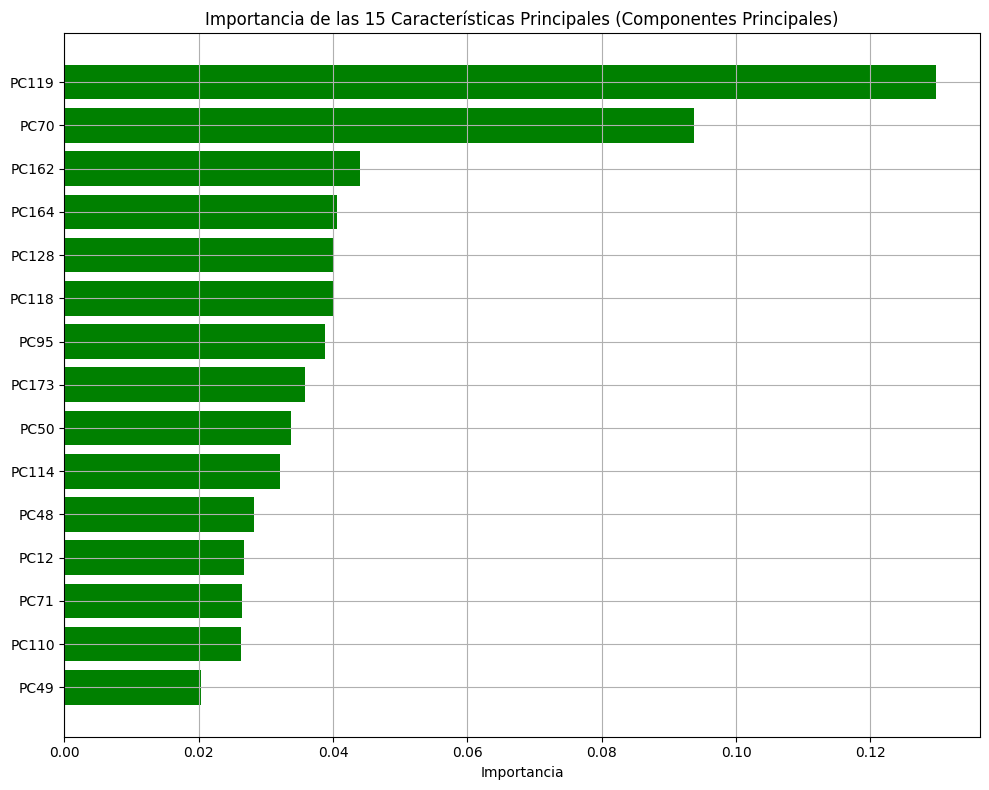

In [ ]:
# Extraer las importancias de las características del modelo
importances_rf = best_rf_model.named_steps['classifier'].feature_importances_

# Obtener los nombres de los componentes principales
pca_components = [f'PC{i+1}' for i in range(len(importances_rf))]

# Crear un DataFrame para visualizar las importancias
feature_importances_rf = pd.DataFrame({
    'Componente Principal': pca_components,
    'Importancia': importances_rf
})

# Ordenar el DataFrame por importancia en orden ascendente
feature_importances_rf = feature_importances_rf.sort_values(by='Importancia', ascending=True)

# Seleccionar únicamente las 15 características más importantes
feature_importances_rf_top15 = feature_importances_rf.tail(15)

# Resetear el índice para una mejor visualización
feature_importances_rf_top15 = feature_importances_rf_top15.reset_index(drop=True)

# Plotear las importancias de las 15 características más importantes
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importances_rf_top15['Componente Principal'],
    feature_importances_rf_top15['Importancia'],
    color='green'
)
plt.xlabel('Importancia')
plt.title('Importancia de las 15 Características Principales (Componentes Principales)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mètricas finales para cada modelo

La tabla muestra las métricas de varios modelos en términos de precisión, recall, accuracy, F1-Score y AUC.

In [38]:
# Mostrar el DataFrame actualizado
print("Métricas de los modelos:")
df_metricss.head(6)

Métricas de los modelos:


,Modelo,Precision,Recall,Accuracy,F1-Score,AUC
0,Bayesiano,0.043700,0.965100,0.843000,0.082000,0.542500
1,K-NN,0.341294,0.694929,0.877022,0.319162,0.706300
2,L1/L2 Penalty Logistic Regression,0.840900,0.879900,0.850800,0.860000,0.845739
3,Random Forest,0.841000,0.880000,0.873000,0.860000,0.993900
4,XGBoost,0.180500,0.500000,0.873000,0.243100,0.833100
5,SVM,0.084900,0.737500,0.675000,0.152300,0.781400


**Conclusiones generales**

*Análisis por modelo:*
1. `Bayesiano`:

- Tiene el recall más alto (0.9651), lo que significa que detecta casi todos los casos positivos correctamente.
- Sin embargo, su precisión (0.0437) es extremadamente baja, lo que indica una alta cantidad de falsos positivos.
- El F1-Score (0.0820) es bajo, mostrando un desequilibrio entre precisión y recall.
- Conclusión: Este modelo podría ser útil si el objetivo es minimizar falsos negativos (priorizando el recall), pero no es confiable para predicciones precisas.
2. `K-NN:`

- Presenta un balance moderado entre todas las métricas.
- Tiene un recall aceptable (0.6949) y una precisión baja (0.3413), resultando en un F1-Score bajo (0.3192).
- Su AUC (0.7063) indica que separa las clases mejor que un modelo aleatorio.
- Conclusión: Este modelo no es ideal para aplicaciones críticas, pero puede ser considerado si se prefiere simplicidad en el entrenamiento.
3. `L1/L2 Penalty Logistic Regression:`

- Tiene un desempeño consistente y equilibrado en todas las métricas, con un - F1-Score alto (0.8600) y una AUC (0.8457) decente.
- Su precisión (0.8409) y recall (0.8799) son altos, lo que lo hace confiable tanto para minimizar falsos positivos como falsos negativos.
- Conclusión: Este modelo es robusto y versátil, adecuado para la mayoría de - - los problemas donde se requiere un balance entre precisión y recall.
4. `Random Forest:`

- Es el mejor modelo en términos de AUC (0.9939), lo que significa que es excelente para distinguir entre clases.
- Su F1-Score (0.8600) es igual al de Logistic Regression, pero con una ligera ventaja en precisión y recall.
- Conclusión: Random Forest es el modelo más sólido en general, especialmente si el objetivo es maximizar la separación entre clases.
5. `XGBoost:`

- Tiene una precisión (0.1805) y recall (0.5000) relativamente bajos, lo que afecta negativamente su F1-Score (0.2431).
- Sin embargo, su AUC (0.8331) muestra que puede realizar una buena separación entre clases en términos relativos.
- Conclusión: Este modelo no es el mejor en esta comparación, pero podría mejorarse con optimización de hiperparámetros.